In [31]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = pd.read_csv("MLTempDataset.csv")
data.head()

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


In [32]:
data = data.set_index('Datetime')
data.drop(columns=data.columns[:2], inplace=True)
data.head()

,DAYTON_MW
Datetime,
2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,20.400


In [42]:
data.tail()

,DAYTON_MW
Datetime,
2022-10-08 23:00:00,27.350
2022-10-09 00:00:00,26.800
2022-10-09 01:00:00,26.450
2022-10-09 02:00:00,25.900
2022-10-09 03:00:00,25.567


In [33]:
data.index[0]

'2022-01-04 00:00:00'

In [34]:
data.index[-1]

'2022-10-09 03:00:00'

In [35]:
data.shape

(6676, 1)

In [41]:
data.describe()

,DAYTON_MW
count,6676.000000
mean,21.736007
std,6.850502
min,5.350000
25%,17.512750
50%,23.900000
75%,26.367000
max,36.500000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6676 entries, 2022-01-04 00:00:00 to 2022-10-09 03:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DAYTON_MW  6676 non-null   float64
dtypes: float64(1)
memory usage: 104.3+ KB


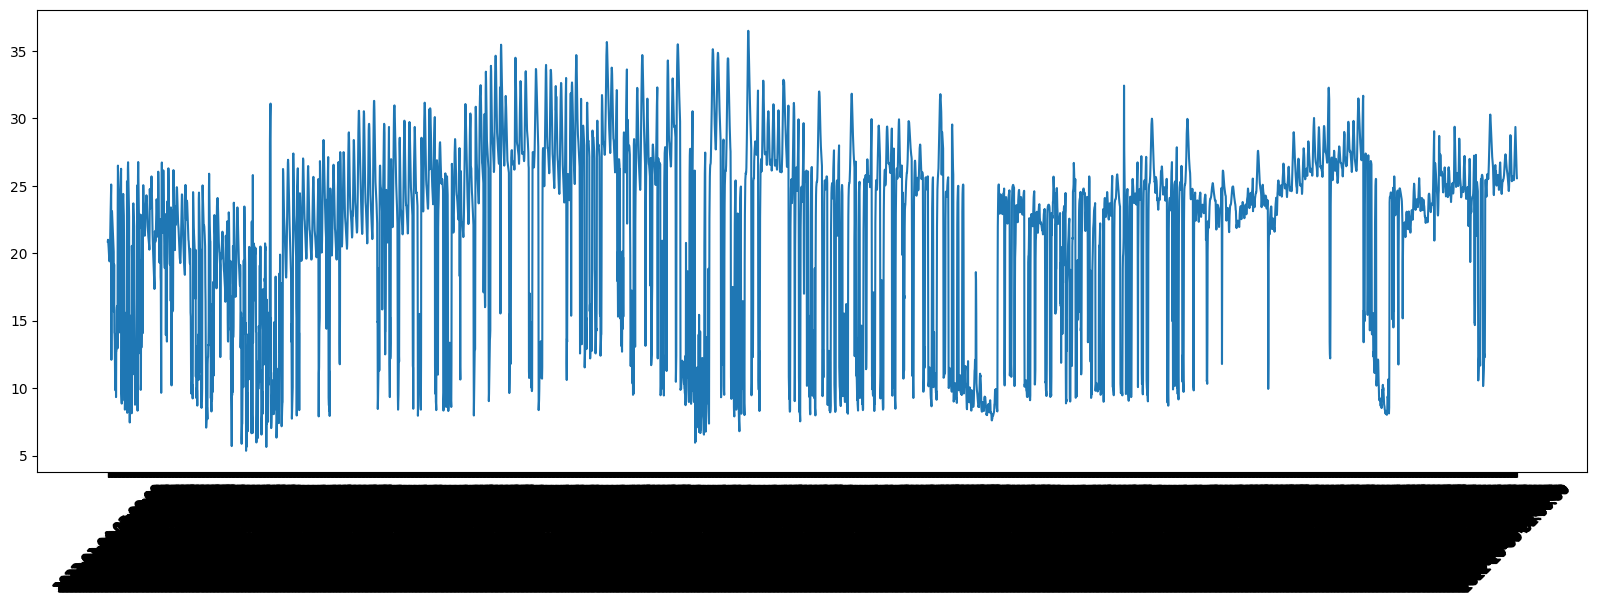

In [43]:
plt.figure(figsize=(20,6))
plt.plot(data)
plt.xticks(rotation=45)
plt.show()

#### Additive time series
Value = Base level + Trend + Seasonality + Error

When to use Additive Model:

* When seasonal variations are roughly constant over time.

* When the data does not exhibit exponential growth or variability.


#### Multiplicative time series
Value = Base level * Trend * Seasonality * Error

When to use Multiplicative Model:

* When seasonal variations increase or decrease proportionally with the level of the series.

* When the data exhibits exponential growth or variability.


In [28]:
data.reset_index(inplace=True)

In [45]:
mul_result = seasonal_decompose(data["DAYTON_MW"],model="multiplicative",period=1)
add_result = seasonal_decompose(data["DAYTON_MW"],model="additive",period=1)

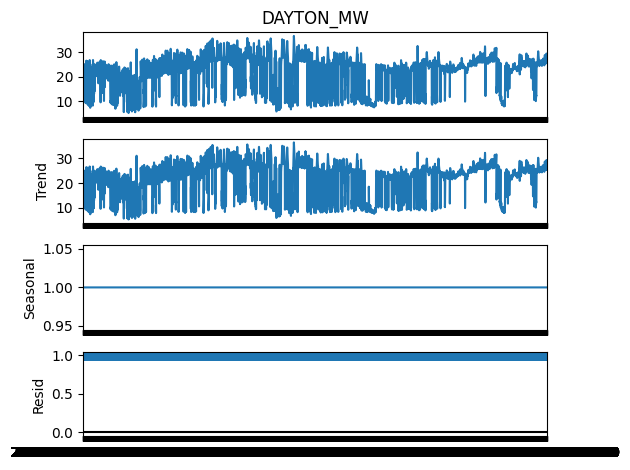

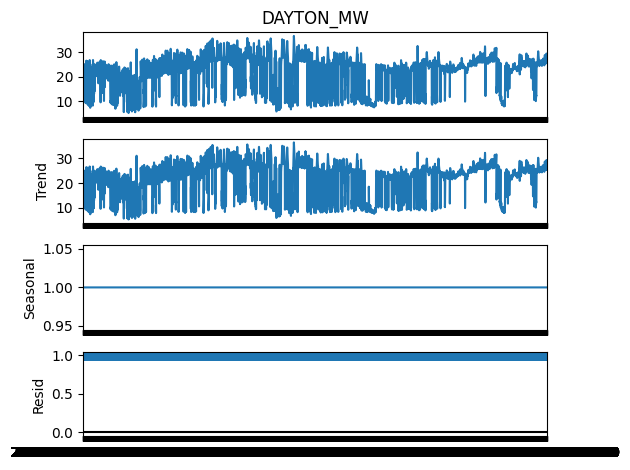

In [46]:
mul_result.plot()

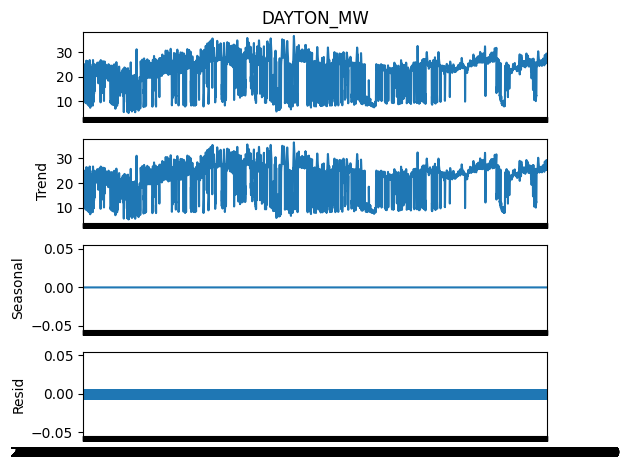

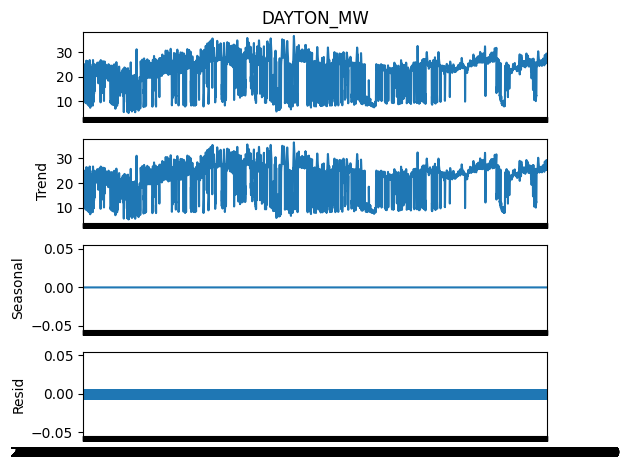

In [47]:
add_result.plot()

In [48]:
# Additive 
add_df = pd.concat([add_result.observed,add_result.trend,add_result.seasonal,add_result.resid],axis=1)
add_df.columns = ['Observed','Trend','Seasonal','Residual'] 
add_df.head()

,Observed,Trend,Seasonal,Residual
Datetime,,,,
2022-01-04 00:00:00,20.867,20.867,0.0,0.0
2022-01-04 01:00:00,21.000,21.000,0.0,0.0
2022-01-04 02:00:00,20.867,20.867,0.0,0.0
2022-01-04 03:00:00,20.650,20.650,0.0,0.0
2022-01-04 04:00:00,20.400,20.400,0.0,0.0


In [49]:
# Multiplicative
mul_df = pd.concat([mul_result.observed,mul_result.trend,mul_result.seasonal,mul_result.resid],axis=1)
mul_df.columns = ['Observed','Trend','Seasonal','Residual']
mul_df.head()

,Observed,Trend,Seasonal,Residual
Datetime,,,,
2022-01-04 00:00:00,20.867,20.867,1.0,1.0
2022-01-04 01:00:00,21.000,21.000,1.0,1.0
2022-01-04 02:00:00,20.867,20.867,1.0,1.0
2022-01-04 03:00:00,20.650,20.650,1.0,1.0
2022-01-04 04:00:00,20.400,20.400,1.0,1.0


# Adfuller test for stationarity

In [50]:
# ADF test - null hypothesis is that the time series is non-stationary- if p value is less than 0.05, we reject the null hypothesis

from statsmodels.tsa.stattools import adfuller

test = adfuller(data["DAYTON_MW"].values, autolag='AIC')

test_statistic = test[0]
p_value = test[1]
num_lags = test[2]
num_obs = test[3]
critical_values = test[4]

In [52]:
print('ADF Test Statistic:', test_statistic)
print('p-value:', round(p_value,3))
print('Number of Lags Used:', num_lags)
print('Number of Observations Used:', num_obs)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Test Statistic: -9.150520719520198
p-value: 0.0
Number of Lags Used: 25
Number of Observations Used: 6650
Critical Values:
   1%: -3.4313337332340956
   5%: -2.8619747274582186
   10%: -2.567001401865566


# The data we have is, stationary data.